In [1]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ARGO Plots

This notebook renders the generated evaluation data into plots presented in the paper. The CSV files containing the results are generated in `eval_*` notebooks.

In [2]:
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
from pathlib import Path
from matplotlib.patches import Patch

In [4]:
results_dir = Path("./results/")
plots_dir = Path("./results/plots/")
palette = {
    "λ=0.0": "#00c14e", "λ=0.25": "#b62471", "λ=0.50": "#5c5ae0", "λ=0.75": "#ed2fd4", "λ=1.0": "#ff9900",
    "clinician": "#808080", "without confuser": "#00CD6C", "with confuser": "#FF1F5B",
    "full context (wis)": "#f76062", "partial context (wis)": "#7c095b",
    "full context": "#00cd6c", "partial context": "#ff1f5b",
    "axes": "#616161",
    "xai": {
        "shap (λ=0.0)": "#FF8E1F", "shap (λ=0.25)": "#FF8E1F", "shap (λ=0.50)": "#FF8E1F", "shap (λ=0.75)": "#FF8E1F", "shap (λ=1.0)": "#FF8E1F",
        "lime (λ=0.0)": "#FF1F5B", "lime (λ=0.25)": "#FF1F5B", "lime (λ=0.50)": "#FF1F5B", "lime (λ=0.75)": "#FF1F5B", "lime (λ=1.0)": "#FF1F5B",
        "single": "#00CD6C", "debate (minimax)": "#00CD6C", "debate (self-play)": "#00CD6C",
    },
    "xai_submission_variant": {
        "shap (λ=0.0)": "#FF1F5B", "shap (λ=0.25)": "#FF1F5B", "shap (λ=0.50)": "#FF1F5B", "shap (λ=0.75)": "#FF1F5B", "shap (λ=1.0)": "#FF1F5B",
        "single": "#00CD6C", "debate (minimax)": "#00CD6C", "debate (self-play)": "#00CD6C",
    },
}

In [5]:
_ = sns.set_theme(
    style="white", context="paper",
    palette="muted",
    rc={
        "pdf.fonttype": 42,
        "ps.fonttype": 42,
        "font.size": 25,
        "axes.titlesize": 25,
        "axes.labelsize": 25,
        "xtick.labelsize": 20,
        "ytick.labelsize": 20,
        "legend.fontsize": 20,
        "legend.columnspacing": 1,
        "legend.title_fontsize": 20,
        "figure.figsize": (6.4, 6.4),
    },
)

## Protagonist

For justifiable policies, we perform several evaluations, both quantitative (e.g., WIS) and qualitative (e.g., mortality analysis).

### Quantitative Evaluation

In this section, we examine quantitative properties of trained justifiable policies, focusing on off-policy evaluation for patient survival and justifiability.

#### WIS Evaluation

We start by rendering WIS evaluation throughout training for justifiable agents trained with different value of $\lambda$ parameter.

In [6]:
protagonist_wis = pd.read_csv(results_dir / "protagonist_wis.csv")
protagonist_wis_4arg = pd.read_csv(results_dir / "protagonist_wis_4arg.csv")
protagonist_wis_full_state = pd.read_csv(results_dir / "protagonist_wis_full_state.csv")

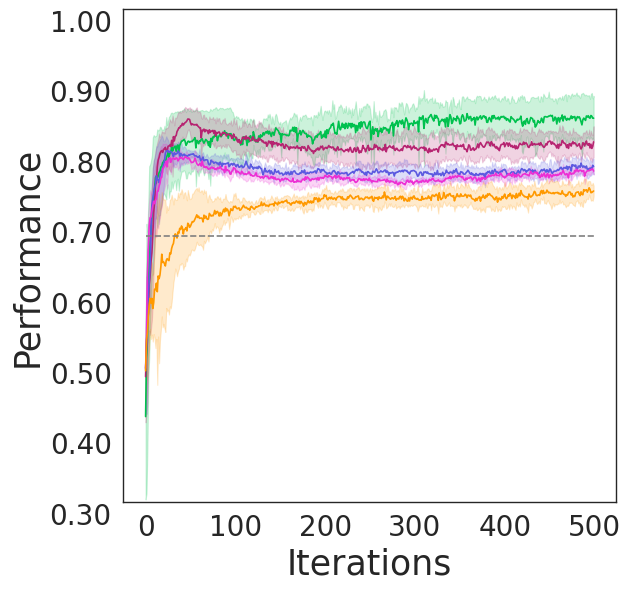

In [123]:
fig, ax = plt.subplots(1)

_ = sns.lineplot(data=protagonist_wis[protagonist_wis.label != "clinician"], x="time_step", y="wis", hue="label", errorbar=("sd", 1), palette=palette, ax=ax)
_ = sns.lineplot(data=protagonist_wis[protagonist_wis.label == "clinician"], x="time_step", y="wis", hue="label", linestyle="--", palette=palette, ax=ax)
_ = ax.set(xlabel="Iterations", ylabel="Performance")
_ = ax.get_legend().set_title(None)
_ = ax.get_legend().get_lines()[-1].set_linestyle("--")
_ = ax.set_ylim([0.3, 1.0])
_ = ax.set_xticks([0, 100, 200, 300, 400, 500])
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.get_legend().remove()
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.set_box_aspect(1)

fig.savefig(plots_dir / f"protagonist__wis_evaluation.pdf", bbox_inches="tight")

#### WIS Evaluation Full vs Partial Context

We compare the WIS evaluation of 6-arg and full-state polices.

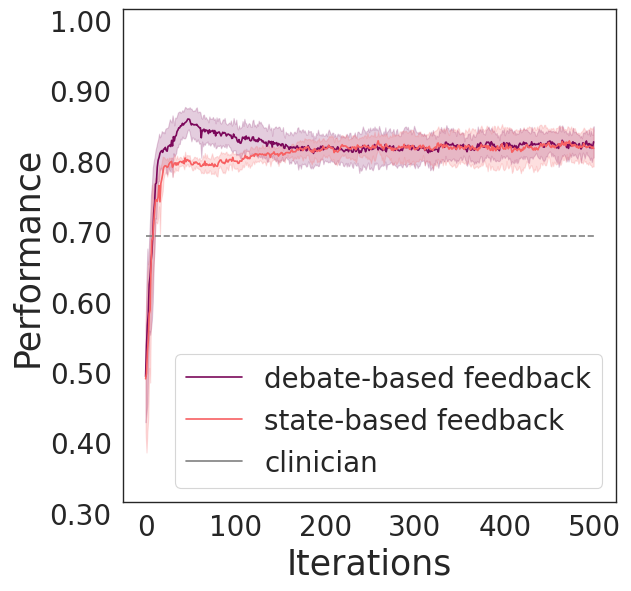

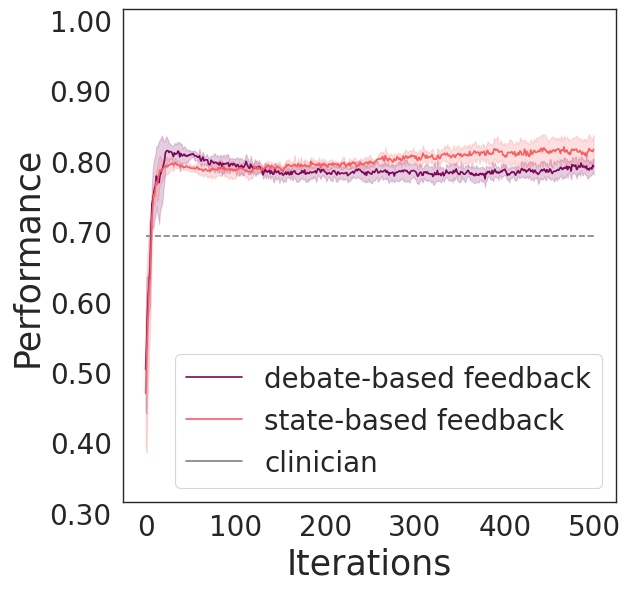

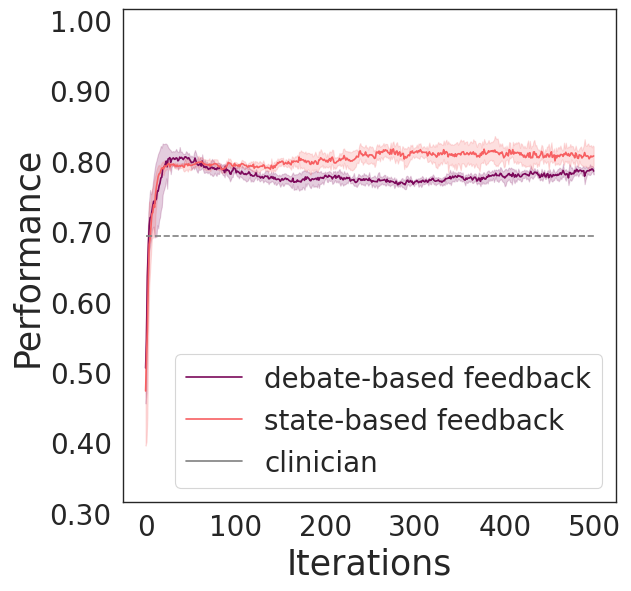

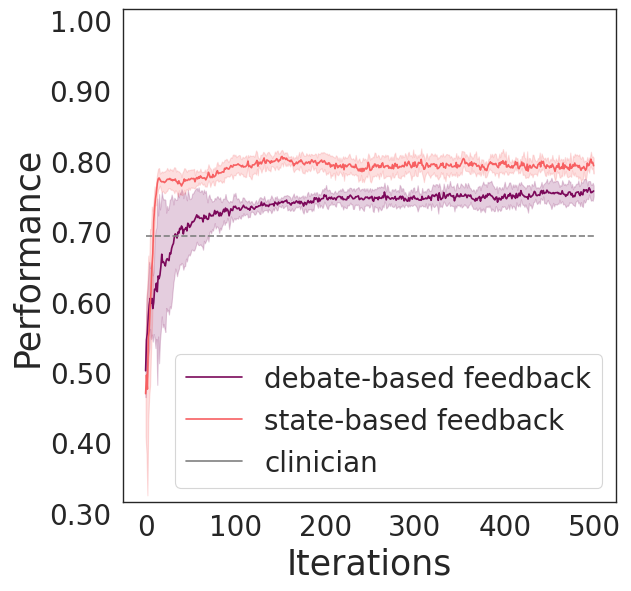

In [124]:
for label in ["λ=0.25", "λ=0.50", "λ=0.75", "λ=1.0"]:
    fig, ax = plt.subplots(1)  
    _ = sns.lineplot(data=protagonist_wis[protagonist_wis.label == label], x="time_step", y="wis", errorbar=("sd", 1), color=palette["partial context (wis)"], label="debate-based feedback", ax=ax)
    _ = sns.lineplot(data=protagonist_wis_full_state[protagonist_wis_full_state.label == label], x="time_step", y="wis", errorbar=("sd", 1), label="state-based feedback", color=palette["full context (wis)"], ax=ax)
    _ = sns.lineplot(data=protagonist_wis[protagonist_wis.label == "clinician"], x="time_step", y="wis", hue="label", linestyle="--", palette=palette, ax=ax)
    _ = ax.set(xlabel="Iterations", ylabel="Performance")
    _ = ax.get_legend().set_title(None)
    _ = ax.get_legend().get_lines()[-1].set_linestyle("--")
    _ = ax.legend(loc="lower right")
    _ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
    _ = [a.set_va("top") for a in ax.get_yticklabels()]
    _ = ax.set_ylim([0.3, 1.0])
    _ = ax.set_xticks([0, 100, 200, 300, 400, 500])
    _ = ax.set_box_aspect(1)
    fig.savefig(plots_dir / f"protagonist__wis_evaluation_full_vs_partial_context_{label}.pdf", bbox_inches="tight")

#### Appendix: WIS Evaluation with 4 arguments

We compare the WIS evaluation of 6-arg and 4-arg policies, for various values of $\lambda$.

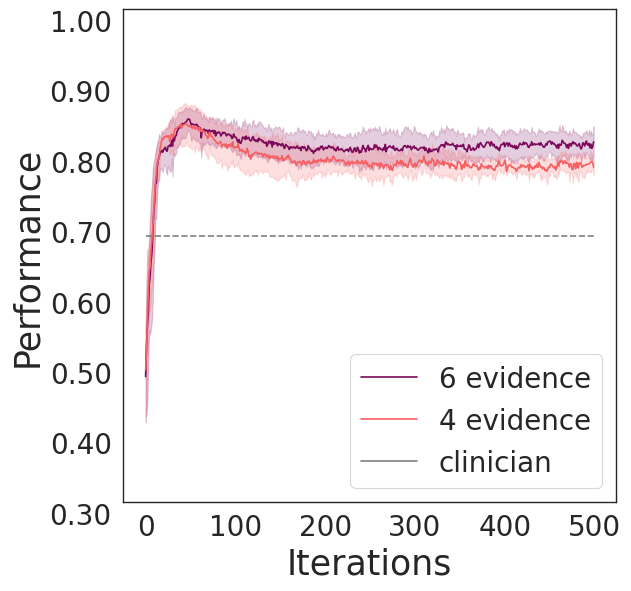

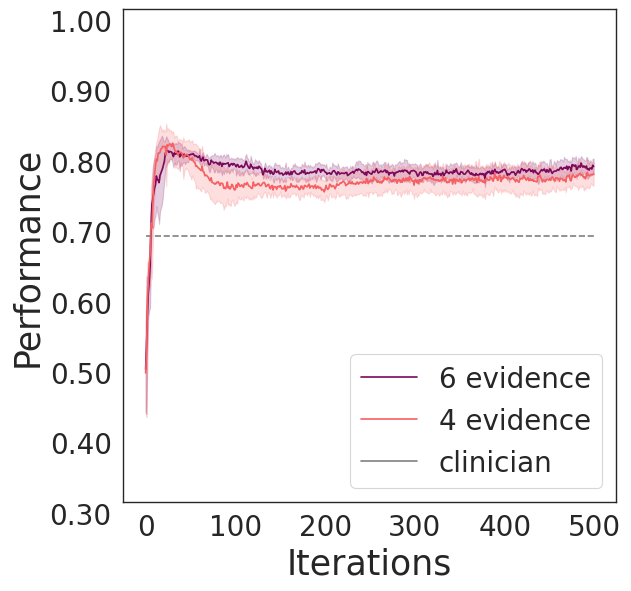

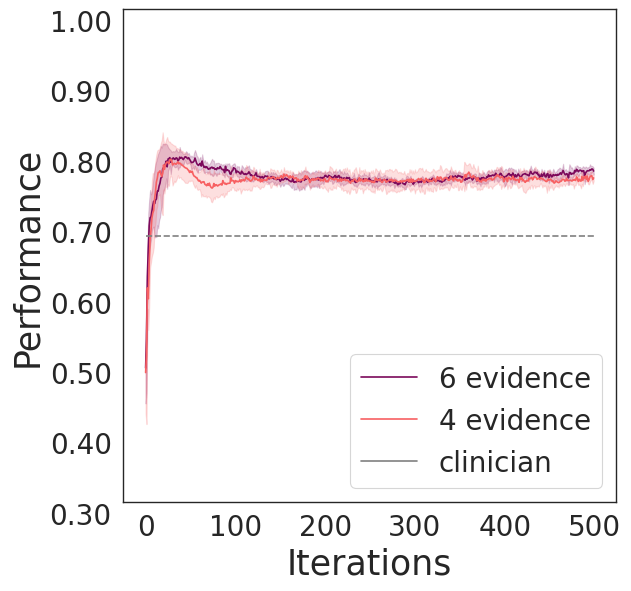

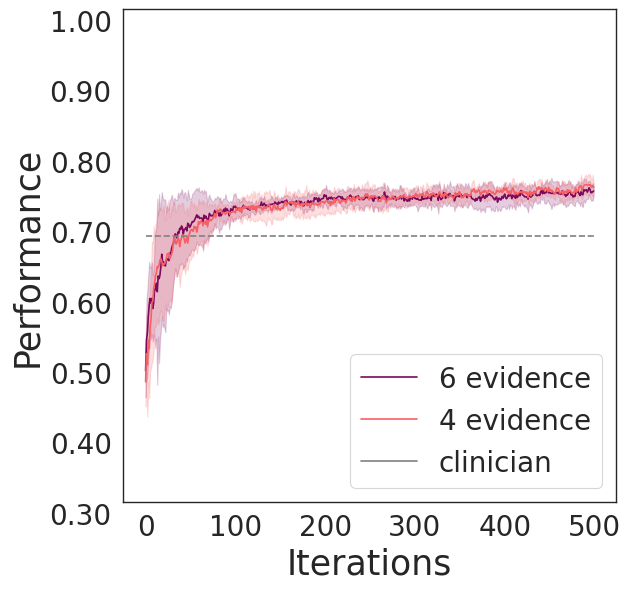

In [10]:
for label in ["λ=0.25", "λ=0.50", "λ=0.75", "λ=1.0"]:
    fig, ax = plt.subplots(1)
    _ = sns.lineplot(data=protagonist_wis[protagonist_wis.label == label], x="time_step", y="wis", errorbar=("sd", 1), color="#7c095b", label="6 evidence", ax=ax)
    _ = sns.lineplot(data=protagonist_wis_4arg[protagonist_wis_4arg.label == label], x="time_step", y="wis", errorbar=("sd", 1), label="4 evidence", color="#f76062", ax=ax)
    _ = sns.lineplot(data=protagonist_wis[protagonist_wis.label == "clinician"], x="time_step", y="wis", hue="label", linestyle="--", palette=palette, ax=ax)
    _ = ax.set(xlabel="Iterations", ylabel="Performance")
    _ = ax.get_legend().set_title(None)
    _ = ax.get_legend().get_lines()[-1].set_linestyle("--")
    _ = ax.set_ylim([0.3, 1.0])
    _ = ax.legend(loc="lower right")
    _ = [a.set_va("top") for a in ax.get_yticklabels()]
    _ = ax.set_xticks([0, 100, 200, 300, 400, 500])
    _ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
    _ = ax.set_box_aspect(1)
    fig.savefig(plots_dir / f"protagonist__wis_evaluation_4arg_{label}.pdf", bbox_inches="tight")

### Qualitative Evaluation

In this section, we perform several qualitative analysis.

#### Dose Excess for Different Justifiability Levels

To start with, we first show the dose excess for each of the values of lambda.

In [17]:
mortality_iv = pd.read_csv(results_dir / "protagonist_mortality_iv.csv")
mortality_vc = pd.read_csv(results_dir / "protagonist_mortality_vc.csv")
mortality_iv_4arg = pd.read_csv(results_dir / "protagonist_mortality_iv_4arg.csv")
mortality_vc_4arg = pd.read_csv(results_dir / "protagonist_mortality_vc_4arg.csv")

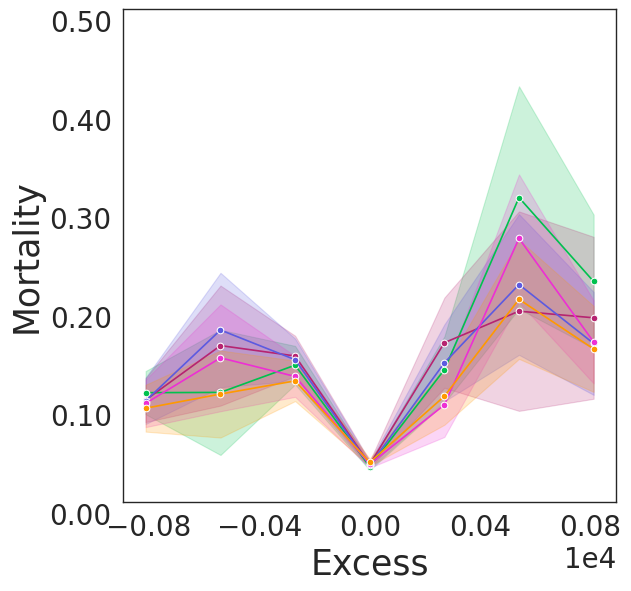

In [18]:
fig, ax = plt.subplots(1)
_ = sns.lineplot(data=mortality_iv, x="excess", y="mortality", markers=True, dashes=False, errorbar=("se", 2), hue="label", legend="brief", marker="o", palette=palette, ax=ax)
_ = ax.set_ylim(0.0, 0.5)
_ = ax.set_xlabel("Excess")
_ = ax.set_ylabel("Mortality")
_ = ax.get_legend().set_title(None)
_ = ax.get_legend().remove()
_ = ax.set_box_aspect(1)
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
_ = ax.set_xticks([-800, -400, 0, 400, 800])
_ = ax.ticklabel_format(axis='x', style='sci', scilimits=(4,4))
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
fig.savefig(plots_dir / f"protagonist__dose_excess_iv.pdf", bbox_inches="tight")

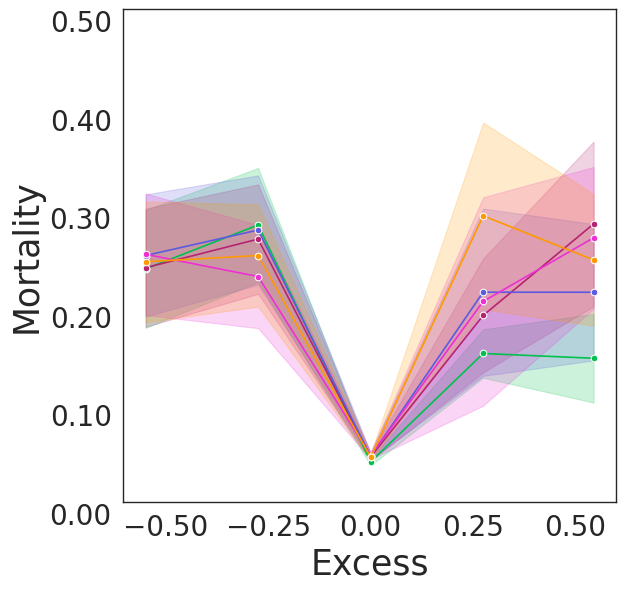

In [140]:
fig, ax = plt.subplots(1)
_ = sns.lineplot(data=mortality_vc, x="excess", y="mortality", markers=True, dashes=False, errorbar=("se", 2), hue="label", legend="brief", marker="o", palette=palette, ax=ax)
_ = ax.set_ylim(0.0, 0.5)
_ = ax.set_xlabel("Excess")
_ = ax.set_ylabel("Mortality")
_ = ax.get_legend().remove()
_ = ax.set_box_aspect(1)
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.set_xticks([-0.5, -0.25, 0.0, 0.25, 0.5])
_ = ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
fig.savefig(plots_dir / f"protagonist__dose_excess_vc.pdf", bbox_inches="tight")

Evaluating dose excess for 4-arg case.

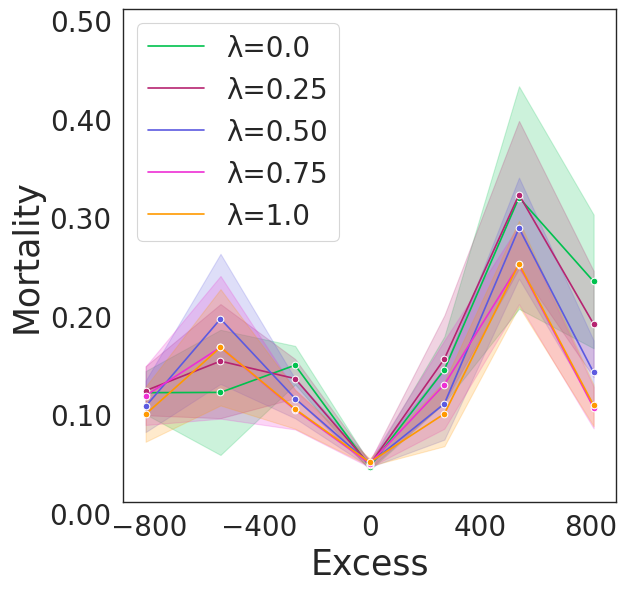

In [20]:
fig, ax = plt.subplots(1)
_ = sns.lineplot(data=mortality_iv_4arg, x="excess", y="mortality", markers=True, dashes=False, errorbar=("se", 2), hue="label", legend="brief", marker="o", palette=palette, ax=ax)
_ = ax.set_ylim(0.0, 0.5)
_ = ax.set_xlabel("Excess")
_ = ax.set_ylabel("Mortality")
_ = ax.get_legend().set_title(None)
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
_ = ax.set_xticks([-800, -400, 0, 400, 800])
fig.savefig(plots_dir / f"protagonist__dose_excess_iv_4arg.pdf", bbox_inches="tight")

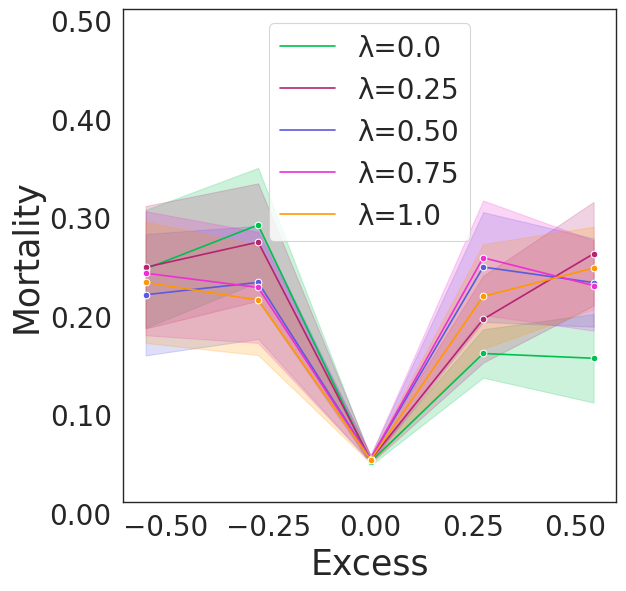

In [141]:
fig, ax = plt.subplots(1)
_ = sns.lineplot(data=mortality_vc_4arg, x="excess", y="mortality", markers=True, dashes=False, errorbar=("se", 2), hue="label", legend="brief", marker="o", palette=palette, ax=ax)
_ = ax.set_ylim(0.0, 0.5)
_ = ax.set_xlabel("Excess")
_ = ax.set_ylabel("Mortality")
_ = ax.set_xticks([-0.5, -0.25, 0.0, 0.25, 0.5])
_ = ax.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_= ax.get_legend().set_title(None)
_ = ax.legend(loc="upper center")
_ = ax.set_box_aspect(1)
fig.savefig(plots_dir / f"protagonist__dose_excess_vc_4arg.pdf", bbox_inches="tight")

### Justifiability Comparison

In this section, we review agents trained with different levels of $\lambda$ parameter, showcasing judge's preference over actions as when compared to the actions of a baseline agent.

In [9]:
protagonist_jstf_vs_baseline_per = pd.read_csv(results_dir / "protagonist_jstf_vs_baseline_per.csv")
protagonist_jstf_vs_baseline_dist = pd.read_csv(results_dir / "protagonist_jstf_vs_baseline_dist.csv")
protagonist_jstf_vs_baseline_eq = pd.read_csv(results_dir / "protagonist_jstf_vs_baseline_eq.csv")
protagonist_jstf_vs_baseline_per_4arg = pd.read_csv(results_dir / "protagonist_jstf_vs_baseline_per_4arg.csv")
protagonist_jstf_vs_baseline_dist_4arg = pd.read_csv(results_dir / "protagonist_jstf_vs_baseline_dist_4arg.csv")
protagonist_jstf_vs_baseline_eq_4arg = pd.read_csv(results_dir / "protagonist_jstf_vs_baseline_eq.csv")

In [39]:
print(protagonist_jstf_vs_baseline_per.groupby("label").mean())
print(protagonist_jstf_vs_baseline_per_4arg.groupby("label").mean())

        justifiability
label                 
λ=0.25           0.742
λ=0.50           0.816
λ=0.75           0.824
λ=1.0            0.842
        justifiability
label                 
λ=0.25        0.770564
λ=0.50        0.845349
λ=0.75        0.864541
λ=1.0         0.868210


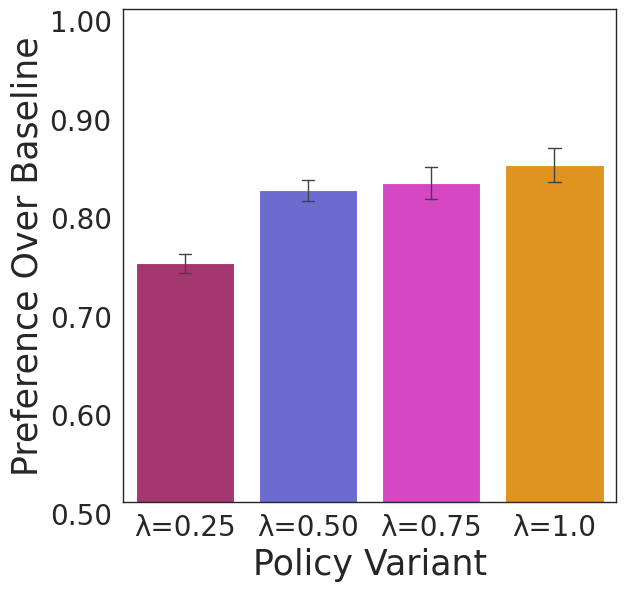

In [42]:
fig, ax = plt.subplots(1)

ax = sns.barplot(data=protagonist_jstf_vs_baseline_per, x="label", y="justifiability", errorbar=("se", 2), capsize=0.1, errwidth=1, alpha=1.0, palette=palette, ax=ax)
_ = ax.set_xlabel("Policy Variant")
_ = ax.set_ylabel("Preference Over Baseline")
_ = ax.set_ylim([0.5, 1.0])
_ = ax.set_box_aspect(1)
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))

fig.savefig(plots_dir / f"protagonist__justifiability_per.pdf", bbox_inches="tight")

Evaluating justifiability of 4-arg polices.

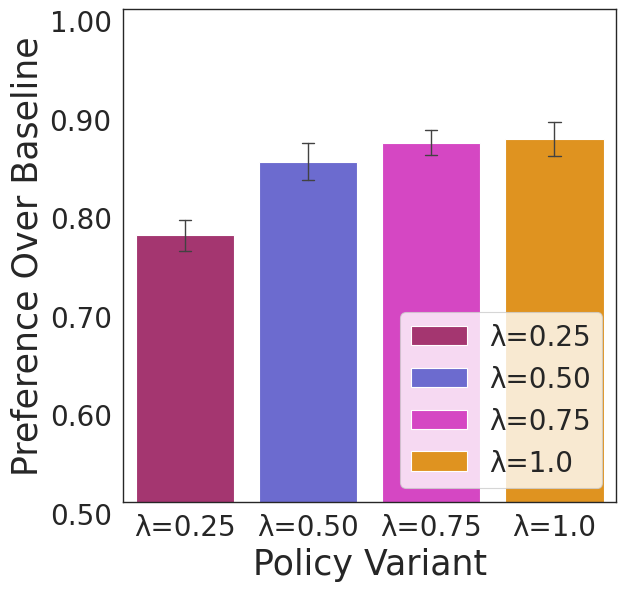

In [43]:
fig, ax = plt.subplots(1)

ax = sns.barplot(data=protagonist_jstf_vs_baseline_per_4arg, x="label", y="justifiability", errorbar=("se", 2), capsize=0.1, errwidth=1, hue="label", dodge=False, palette=palette, ax=ax)
_ = ax.set_xlabel("Policy Variant")
_ = ax.set_ylabel("Preference Over Baseline")
_ = ax.set_ylim([0.5, 1.0])
_ = ax.set_box_aspect(1)
_ = ax.get_legend().set_title(None)
_ = ax.get_legend().remove()
_ = ax.legend(loc="lower right")
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))

fig.savefig(plots_dir / f"protagonist__justifiability_per_4arg.pdf", bbox_inches="tight")

In [112]:
df_curr = protagonist_jstf_vs_baseline_dist.groupby(["label", "justifiability"]).size().reset_index(name="count")
df_curr.justifiability = pd.Categorical(df_curr.justifiability, [-1, 0, 1]).rename_categories({-1: "BP", 0: "EP", 1: "JP"})
total_count = df_curr.groupby("label").sum("count").reset_index()["count"][0]
df_curr["count"] = df_curr["count"] / total_count

Showcasing preference breakdown for a 6-arg case.

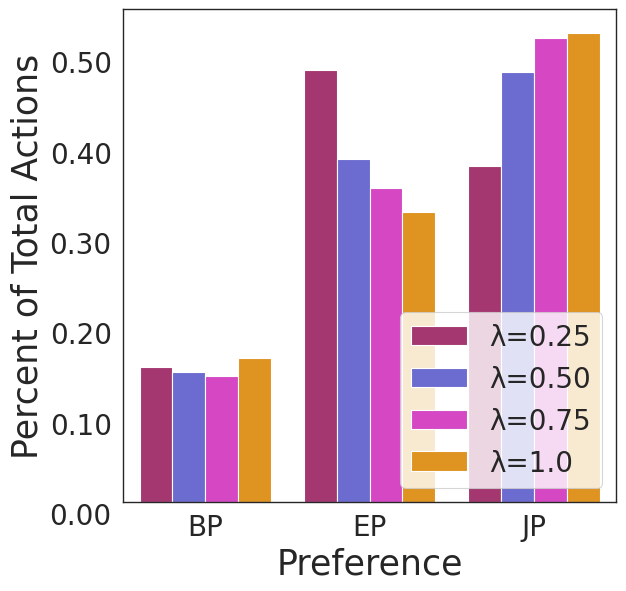

In [111]:
fig, ax = plt.subplots(1)

ax = sns.barplot(data=df_curr, x="justifiability", y="count", hue="label", errorbar=("se", 2), capsize=0.1, errwidth=1, alpha=1.0, palette=palette, ax=ax)
_ = ax.set_xlabel("Preference")
_ = ax.set_ylabel("Percent of Total Actions")
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.legend(loc="lower right")
_ = [a.set_va("top") for a in ax.get_yticklabels()]

fig.savefig(plots_dir / f"protagonist__justifiability_dist.pdf", bbox_inches="tight")

Showcasing preference breakdown for a 4-arg case.

In [114]:
df_curr = protagonist_jstf_vs_baseline_dist_4arg.groupby(["label", "justifiability"]).size().reset_index(name="count")
df_curr.justifiability = pd.Categorical(df_curr.justifiability, [-1, 0, 1]).rename_categories({-1: "BP", 0: "EP", 1: "JP"})
total_count = df_curr.groupby("label").sum("count").reset_index()["count"][0]
df_curr["count"] = df_curr["count"] / total_count

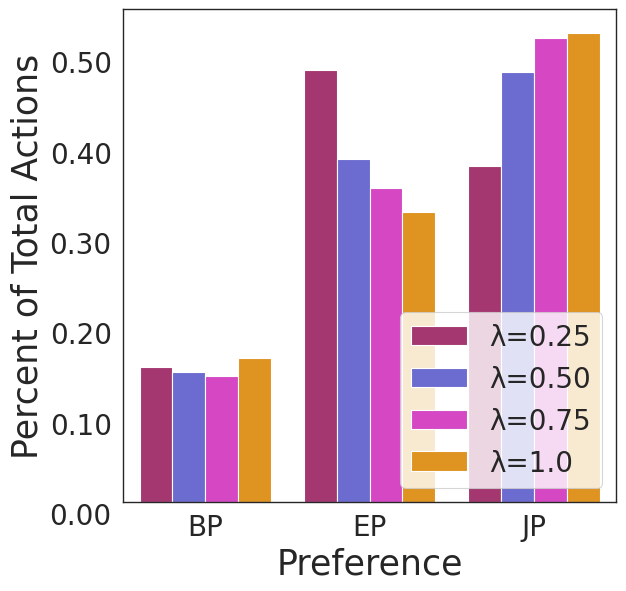

In [110]:
fig, ax = plt.subplots(1)

ax = sns.barplot(data=df_curr, x="justifiability", y="count", hue="label", errorbar=("se", 2), capsize=0.1, errwidth=1, alpha=1.0, palette=palette, ax=ax)
_ = ax.set_xlabel("Preference")
_ = ax.set_ylabel("Percent of Total Actions")
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.legend(loc="lower right")
_ = [a.set_va("top") for a in ax.get_yticklabels()]

fig.savefig(plots_dir / f"protagonist__justifiability_dist_4arg.pdf", bbox_inches="tight")

## Argumentation

In this section, we plot results that relate to argumentation.

In [6]:
argumentator_vs_confuser = pd.read_csv(results_dir / "argumentator_vs_confuser.csv")
argumentator_vs_confuser_4 = argumentator_vs_confuser[argumentator_vs_confuser.num_arguments == 4]
argumentator_vs_confuser_6 = argumentator_vs_confuser[argumentator_vs_confuser.num_arguments == 6]

### Confuser Evaluation (6 args)

We showcase the ability of an agent to resist the counter-arguments proposed by an adversarial confuser agent.

In [39]:
df_curr = argumentator_vs_confuser_6.copy()
df_isolated_precommit = argumentator_vs_confuser[argumentator_vs_confuser.model == "single (3 arg)"].copy() # precommit version
df_curr = df_curr[~(df_curr.model.isin(["single (6 arg)", "debate (minimax, 6 arg, rewdiff)", "debate (self-play, 6 arg, rewdiff)"]))]
df_curr = pd.concat([df_curr, df_isolated_precommit])
df_curr.model = pd.Categorical(df_curr.model, ["single (3 arg)", "debate (minimax, 6 arg)", "debate (self-play, 6 arg)"]).rename_categories({"single (3 arg)": "single", "debate (minimax, 6 arg)": "debate (minimax)", "debate (self-play, 6 arg)": "debate (self-play)"})

In [40]:
df_curr.groupby(["model", "kind"]).mean("rew")

num_arguments    rew
model              kind                                  
single             with confuser               3.0  0.381
                   without confuser            3.0  0.881
debate (minimax)   with confuser               6.0  0.850
                   without confuser            6.0  0.897
debate (self-play) with confuser               6.0  0.858
                   without confuser            6.0  0.863

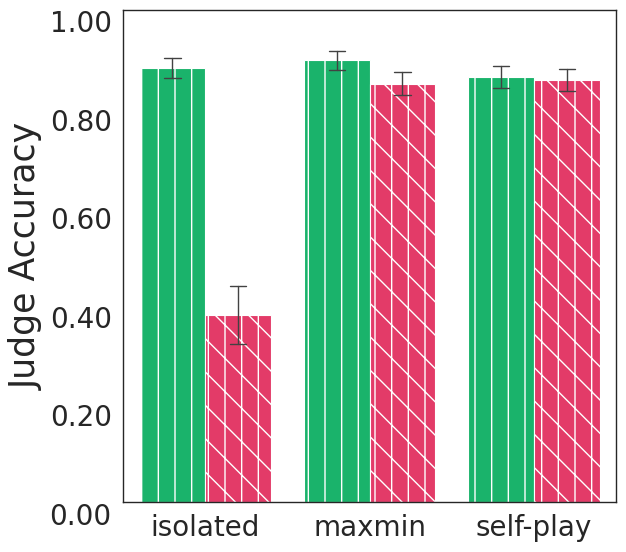

In [41]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=df_curr, x="model", y="rew", hue="kind", errorbar=("se", 2), errwidth=1.0, capsize=0.1, palette=palette, ax=ax)
_ = ax.set_xlabel(None)
_ = ax.set_ylabel("Judge Accuracy")
_ = ax.get_legend().remove()
_ = ax.set_ylim(0.0, 1.0)
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["isolated", "maxmin", "self-play"])
_ = [a.set_va("top") for a in ax.get_yticklabels()]

hatches = itertools.cycle(["|", "|\\"])
for i, bar in enumerate(ax.patches):
    if i % 3 == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

fig.savefig(plots_dir / f"argumentation__confuser_eval_6arg.pdf", bbox_inches="tight")

### Confuser Evaluation (4 args)

We repeat the same evaluation for 4 arguments.

In [7]:
df_curr = argumentator_vs_confuser_4.copy()
df_curr.model = pd.Categorical(df_curr.model, ["single (4 arg)", "debate (minimax, 4 arg)", "debate (self-play, 4 arg)"]).rename_categories({"single (4 arg)": "single", "debate (minimax, 4 arg)": "debate (minimax)", "debate (self-play, 4 arg)": "debate (self-play)"})

In [8]:
df_curr.groupby(["model", "kind"]).mean("rew")

num_arguments    rew
model              kind                                  
single             with confuser               4.0  0.364
                   without confuser            4.0  0.898
debate (minimax)   with confuser               4.0  0.828
                   without confuser            4.0  0.877
debate (self-play) with confuser               4.0  0.836
                   without confuser            4.0  0.882

/tmp/ipykernel_2245194/3862020704.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.0}` instead.

  _ = sns.barplot(data=df_curr, x="model", y="rew", hue="kind", errorbar=("se", 2), errwidth=1.0, capsize=0.1, palette=palette, ax=ax)
/tmp/ipykernel_2245194/3862020704.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = ax.set_xticklabels(["isolated", "maxmin", "self-play"])


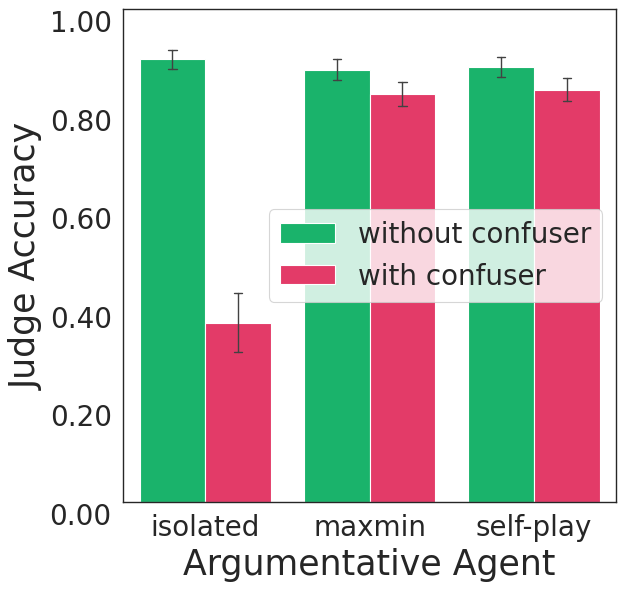

In [9]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=df_curr, x="model", y="rew", hue="kind", errorbar=("se", 2), errwidth=1.0, capsize=0.1, palette=palette, ax=ax)
_ = ax.set_xlabel("Argumentative Agent")
_ = ax.get_legend().set_title(None)
_ = ax.set_ylabel("Judge Accuracy")
_ = ax.set_ylim(0.0, 1.0)
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["isolated", "maxmin", "self-play"])
_ = [a.set_va("top") for a in ax.get_yticklabels()]

fig.savefig(plots_dir / f"argumentation__confuser_eval_4arg.pdf", bbox_inches="tight")

### Precommit vs. Adaptive Strategies for Isolated Agent

We compare performance of two different strategies for training the isolated agent (see App. D.3).

In [44]:
df_isolated_adaptive = argumentator_vs_confuser[argumentator_vs_confuser.model == "single (6 arg)"].copy()
df_isolated_precommit = argumentator_vs_confuser[argumentator_vs_confuser.model == "single (3 arg)"].copy()
df_curr = pd.concat([df_isolated_adaptive, df_isolated_precommit])
df_curr.model = pd.Categorical(df_curr.model, ["single (3 arg)", "single (6 arg)"]).rename_categories({"single (6 arg)": "isolated (adaptive)", "single (3 arg)": "isolated (precommit)"})

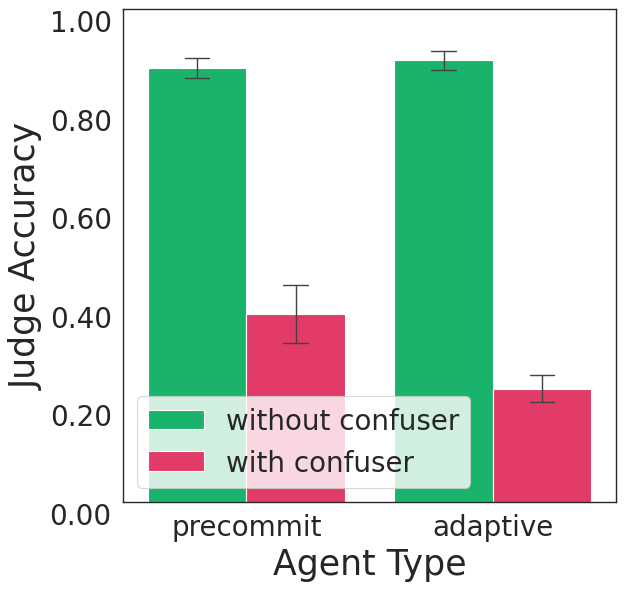

In [45]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=df_curr, x="model", y="rew", hue="kind", errorbar=("se", 2), errwidth=1.0, capsize=0.1, palette=palette, ax=ax)
_ = ax.set_xlabel("Agent Type")
_ = ax.set_ylabel("Judge Accuracy")
_ = ax.get_legend().set_title(None)
_ = ax.set_ylim(0.0, 1.0)
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["precommit", "adaptive"])
_ = [a.set_va("top") for a in ax.get_yticklabels()]

fig.savefig(plots_dir / f"argumentation__confuser_eval_6arg_adaptive_vs_precommit.pdf", bbox_inches="tight")

### Different Utility Function

Comparison of debate agents trained via -1, 0, +1 reward signals, compared to debate agents trained to optimize the difference between judge's evaluations (see App. D.4).

In [8]:
df_curr = argumentator_vs_confuser.copy()
df_curr = df_curr[df_curr.model != "single (6 arg)"]
df_curr.model = pd.Categorical(df_curr.model, ["debate (minimax, 6 arg)", "debate (self-play, 6 arg)", "debate (minimax, 6 arg, rewdiff)", "debate (self-play, 6 arg, rewdiff)"]) \
    .rename_categories({"debate (minimax, 6 arg)": "debate (minimax)", "debate (self-play, 6 arg)": "debate (self-play)",
                        "debate (minimax, 6 arg, rewdiff)": "debate (minimax, rewdiff)", "debate (self-play, 6 arg, rewdiff)": "debate (self-play, rewdiff)"})

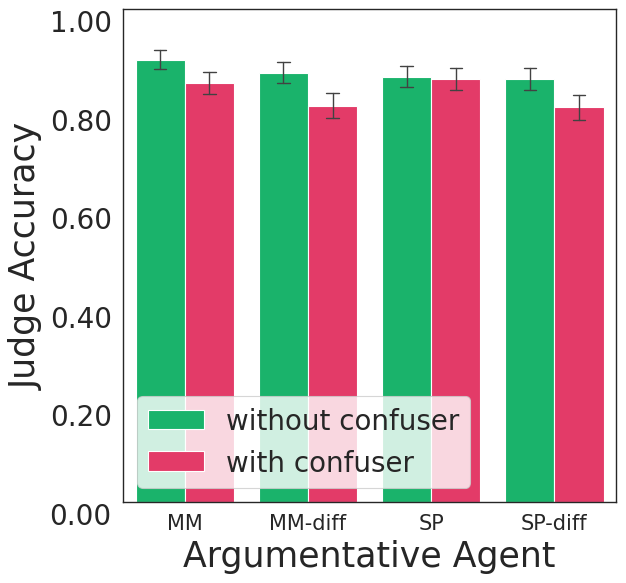

In [15]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=df_curr, x="model", y="rew", hue="kind", errorbar=("se", 2), errwidth=1.0, capsize=0.1, palette=palette, ax=ax)
_ = ax.set_xlabel("Argumentative Agent")
_ = ax.get_legend().set_title(None)
_ = ax.set_ylabel("Judge Accuracy")
_ = ax.set_ylim(0.0, 1.0)
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["MM", "MM-diff", "SP", "SP-diff"], fontdict={"fontsize": 15})
_ = [a.set_va("top") for a in ax.get_yticklabels()]

fig.savefig(plots_dir / f"argumentation__confuser_rewdiff.pdf", bbox_inches="tight")

### Comparison with XAI

In this section, we perform some experiments with methods of explainable artificial intelligence (XAI), in particular methods of feature attribution.

#### XAI Alignment

Here, we depict the results of the alignment experiment.

In [121]:
xai_alignment = pd.read_csv(results_dir / "xai_alignment.csv")

In [122]:
df_argumentator = xai_alignment[xai_alignment.model == "argumentator"].copy()
df_shap = xai_alignment[xai_alignment.model == "shap"].copy()
df_lime = xai_alignment[xai_alignment.model == "lime"].copy()

df_argumentator["label"] = df_argumentator["label"].str.replace("minimax", "debate (minimax)")
df_argumentator["label"] = df_argumentator["label"].str.replace("self-play", "debate (self-play)")
df_shap.label = "shap (" + df_shap.label + ")"
df_lime.label = "lime (" + df_lime.label + ")"

df_curr = pd.concat([df_argumentator, df_shap, df_lime])

Plot the comparison to SHAP and LIME. Note that the LIME comparison was added only after the submission deadline, and is therefore not reported in the main paper. Nevertheless, we show it here for completeness.

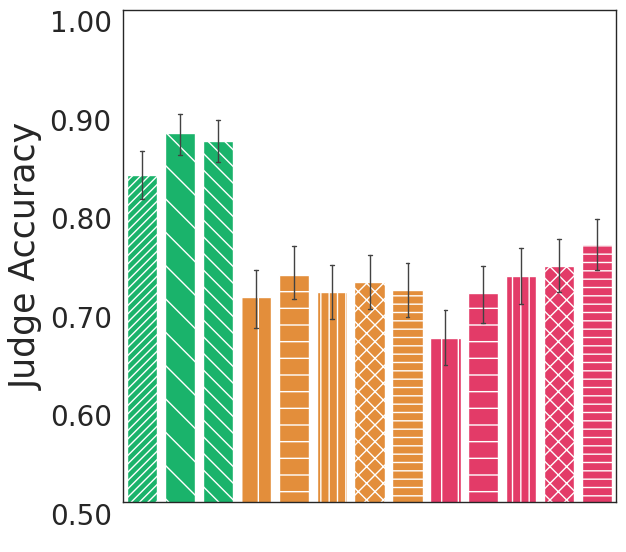

In [124]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=df_curr, x="label", y="won", palette=palette["xai"], ax=ax, errwidth=1.0, capsize=0.1, linewidth=1.0)
_ = ax.set_xlabel(None)
_ = ax.set_xticks([])
_ = ax.set_ylabel("Judge Accuracy")
_ = ax.set_ylim(0.50, 1.0)
_ = ax.set_box_aspect(1)
_ = ax.set_xticks([i for i in range(8)], ["lab" for _ in range(8)], color="white")
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))

hatches = itertools.cycle(["////", "\\", "\\\\", "|", "-", "||", "xx", "--", "|", "-", "||", "xx", "--"])
for i, bar in enumerate(ax.patches):
    hatch = next(hatches)
    bar.set_hatch(hatch)

fig.savefig(plots_dir / f"argumentation__shap_lime_comparison.pdf", bbox_inches="tight")

#### XAI Robustness

An alternative set of experiments examines the robustness of the SHAP feature attribution method. This result did not end up in the main paper.

In [125]:
xai_robustness = pd.read_csv(results_dir / "xai_robustness.csv")
xai_robustness.groupby(["method", "label"]).mean()

num_arguments    rew
method label                                 
lime   with confuser               6.0  0.475
       without confuser            6.0  0.841
shap   with confuser               6.0  0.482
       without confuser            6.0  0.867

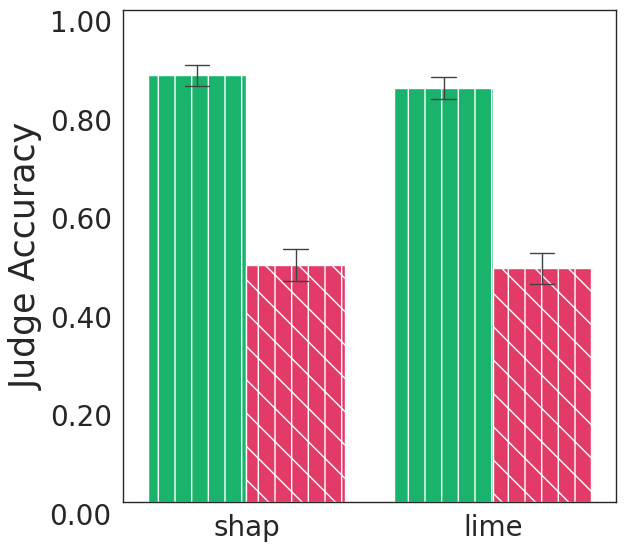

In [126]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=xai_robustness, x="method", y="rew", hue="label", errorbar=("se", 2), errwidth=1.0, capsize=0.1, linewidth=1.0, palette=palette, ax=ax)
_ = ax.set_xlabel(None)
_ = ax.get_legend().remove()
_ = ax.set_ylabel("Judge Accuracy")
_ = ax.set_ylim(0.0, 1.0)
_ = ax.set_box_aspect(1)
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = [a.set_va("top") for a in ax.get_yticklabels()]

hatches = itertools.cycle(["|", "|\\"])
for i, bar in enumerate(ax.patches):
    if i % 2 == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

fig.savefig(plots_dir / f"argumentation__confuser_eval_xi.pdf", bbox_inches="tight")

### Full vs. Partial Context

To demonstrate that learning from a partial context is comparable to learning from the full context, we setup an evaluation scheme where we compare the Q-values of policies learned with full and partial context. The plot shows percent of times policies trained with full context judge had a higher Q-value for the true action from the dataset, than policies trained with the partial-context judge (see Sec. 5.3).

In [132]:
protagonist_full_vs_partial_context = pd.read_csv(results_dir / "protagonist_full_vs_partial_context.csv")
protagonist_full_vs_partial_context_4arg = pd.read_csv(results_dir / "protagonist_full_vs_partial_context_4arg.csv")

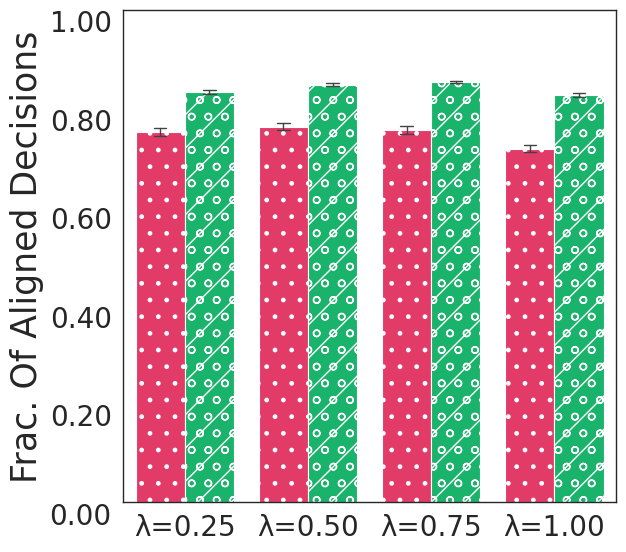

In [151]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=protagonist_full_vs_partial_context, x="label", y="preference", hue="kind", errorbar=("se", 2), errwidth=1.0, capsize=0.1, palette=palette, ax=ax)
_ = ax.set(xlabel=None, ylabel="Frac. Of Aligned Decisions")
_ = ax.set_ylim([0.0, 1.0])
_ = ax.set_box_aspect(1)
_ = ax.get_legend().remove()
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["λ=0.25", "λ=0.50", "λ=0.75", "λ=1.00"])

hatches = itertools.cycle([".", "/o"])
for i, bar in enumerate(ax.patches):
    if i % 4 == 0:
        hatch = next(hatches)
    bar.set_hatch(hatch)

fig.savefig(plots_dir / f"argumentation__full_vs_partial_context.pdf", bbox_inches="tight")

Repeating evaluation with 4-arg policies.

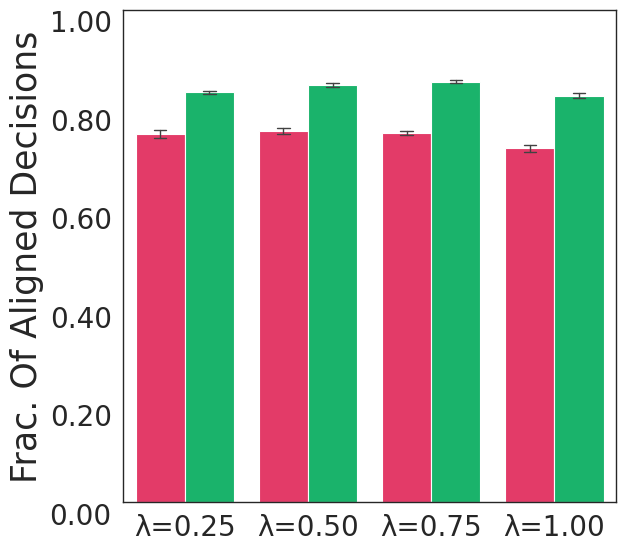

In [152]:
fig, ax = plt.subplots(1)

_ = sns.barplot(data=protagonist_full_vs_partial_context_4arg, x="label", y="preference", hue="kind", errorbar=("se", 2), errwidth=1.0, capsize=0.1, palette=palette, ax=ax)
_ = ax.set_ylim([0.0, 1.0])
_ = ax.set(xlabel=None, ylabel="Frac. Of Aligned Decisions")
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.get_legend().remove()
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_box_aspect(1)
_ = ax.set_xticklabels(["λ=0.25", "λ=0.50", "λ=0.75", "λ=1.00"])

fig.savefig(plots_dir / f"argumentation__full_vs_partial_context_4arg.pdf", bbox_inches="tight")

# Legends

In this section we artificially create and export legends used for different plots.

Plot legend without LIME (submitted version).

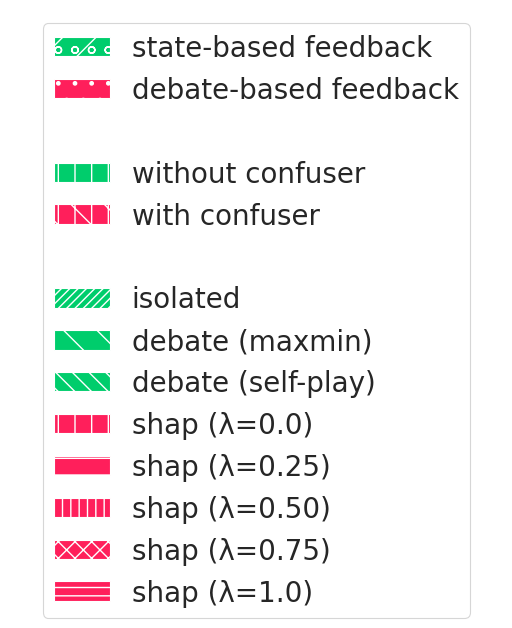

In [133]:
fig, ax = plt.subplots(1)

handles = [
    # full vs. partial Context
    Patch(facecolor=palette["full context"], edgecolor=None, label="state-based feedback", hatch="/o"),
    Patch(facecolor=palette["partial context"], edgecolor=None, label="debate-based feedback", hatch="."),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),

    # argumentative agents evaluation 
    Patch(facecolor=palette["without confuser"], edgecolor=None, label="without confuser", hatch="|"),
    Patch(facecolor=palette["with confuser"], edgecolor=None, label="with confuser", hatch="|\\"),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),
    
    # argumentative agents and SHAP/LIME explanations
    Patch(facecolor=palette["xai_submission_variant"]["single"], edgecolor=None, label="isolated", hatch="////"),
    Patch(facecolor=palette["xai_submission_variant"]["debate (minimax)"], edgecolor=None, label="debate (maxmin)", hatch="\\"),
    Patch(facecolor=palette["xai_submission_variant"]["debate (self-play)"], edgecolor=None, label="debate (self-play)", hatch="\\\\"),

    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.0)"], edgecolor=None, label="shap (λ=0.0)", hatch="|"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.25)"], edgecolor=None, label="shap (λ=0.25)", hatch="-"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.50)"], edgecolor=None, label="shap (λ=0.50)", hatch="||"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.75)"], edgecolor=None, label="shap (λ=0.75)", hatch="xx"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=1.0)"], edgecolor=None, label="shap (λ=1.0)", hatch="--"),
]

_ = sns.barplot(data=protagonist_full_vs_partial_context, x="label", y="preference", hue="kind", errorbar=None, errwidth=1.0, capsize=0.1, palette={"full context": "white", "partial context": "white"}, ax=ax)
_ = ax.set(xlabel=None, ylabel="Frac. Of Aligned Decisions")
_ = ax.set_ylim([0.0, 1.0])
_ = ax.set_box_aspect(1)
_ = ax.legend(handles=handles, loc="upper center", ncol=1, columnspacing=2, fontsize=20)
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["λ=0.25", "λ=0.50", "λ=0.75", "λ=1.00"])
_ = ax.yaxis.label.set_color("white")
_ = ax.tick_params(axis="x", colors="white")
_ = ax.tick_params(axis="y", colors="white")
_ = ax.axis("off")

for grid in ax.get_xgridlines(): grid.set_color("white")
for grid in ax.get_ygridlines(): grid.set_color("white")
for spine in ax.spines.values():
    spine.set_edgecolor("gray")

fig.savefig(Path("./results") / "plots" / "argumentation__legend.pdf", bbox_inches="tight")

Visually updated legend for the updated paper version.

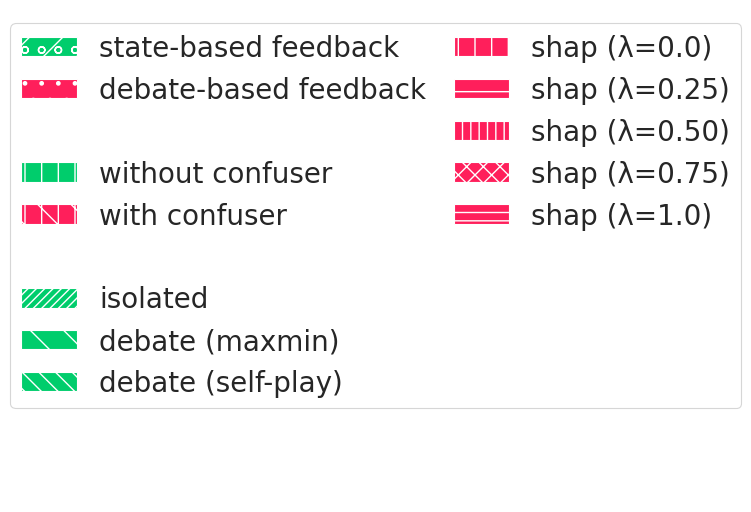

In [134]:
fig, ax = plt.subplots(1)

handles = [
    # full vs. partial Context
    Patch(facecolor=palette["full context"], edgecolor=None, label="state-based feedback", hatch="/o"),
    Patch(facecolor=palette["partial context"], edgecolor=None, label="debate-based feedback", hatch="."),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),

    # argumentative agents evaluation 
    Patch(facecolor=palette["without confuser"], edgecolor=None, label="without confuser", hatch="|"),
    Patch(facecolor=palette["with confuser"], edgecolor=None, label="with confuser", hatch="|\\"),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),

    # xai evaluation
    Patch(facecolor=palette["xai_submission_variant"]["single"], edgecolor=None, label="isolated", hatch="////"),
    Patch(facecolor=palette["xai_submission_variant"]["debate (minimax)"], edgecolor=None, label="debate (maxmin)", hatch="\\"),
    Patch(facecolor=palette["xai_submission_variant"]["debate (self-play)"], edgecolor=None, label="debate (self-play)", hatch="\\\\"),

    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.0)"], edgecolor=None, label="shap (λ=0.0)", hatch="|"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.25)"], edgecolor=None, label="shap (λ=0.25)", hatch="-"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.50)"], edgecolor=None, label="shap (λ=0.50)", hatch="||"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=0.75)"], edgecolor=None, label="shap (λ=0.75)", hatch="xx"),
    Patch(facecolor=palette["xai_submission_variant"]["shap (λ=1.0)"], edgecolor=None, label="shap (λ=1.0)", hatch="--"),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),
]

_ = sns.barplot(data=protagonist_full_vs_partial_context, x="label", y="preference", hue="kind", errorbar=None, errwidth=1.0, capsize=0.1, palette={"full context": "white", "partial context": "white"}, ax=ax)
_ = ax.set(xlabel=None, ylabel="Frac. Of Aligned Decisions")
_ = ax.set_ylim([0.0, 1.0])
_ = ax.set_box_aspect(1)
_ = ax.legend(handles=handles, loc="upper center", ncol=2, columnspacing=1, fontsize=20)
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["λ=0.25", "λ=0.50", "λ=0.75", "λ=1.00"])
_ = ax.yaxis.label.set_color("white")
_ = ax.tick_params(axis="x", colors="white")
_ = ax.tick_params(axis="y", colors="white")
_ = ax.axis("off")

for grid in ax.get_xgridlines(): grid.set_color("white")
for grid in ax.get_ygridlines(): grid.set_color("white")
for spine in ax.spines.values():
    spine.set_edgecolor("gray")

fig.savefig(Path("./results") / "plots" / "argumentation__legend_2col.pdf", bbox_inches="tight")

Legend that includes LIME results.

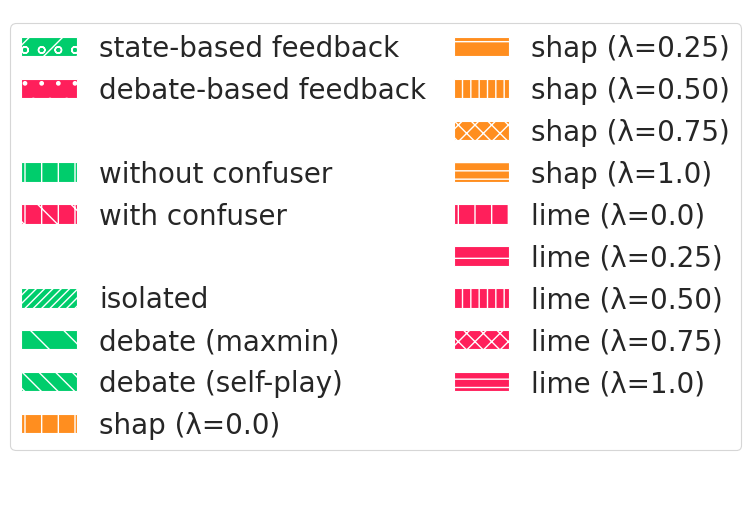

In [135]:
fig, ax = plt.subplots(1)

handles = [
    # full vs. partial Context
    Patch(facecolor=palette["full context"], edgecolor=None, label="state-based feedback", hatch="/o"),
    Patch(facecolor=palette["partial context"], edgecolor=None, label="debate-based feedback", hatch="."),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),

    # argumentative agents evaluation 
    Patch(facecolor=palette["without confuser"], edgecolor=None, label="without confuser", hatch="|"),
    Patch(facecolor=palette["with confuser"], edgecolor=None, label="with confuser", hatch="|\\"),
    Patch(facecolor="#ffffff", edgecolor=None, linewidth=0, label=""),

    # xai evaluation
    Patch(facecolor=palette["xai"]["single"], edgecolor=None, label="isolated", hatch="////"),
    Patch(facecolor=palette["xai"]["debate (minimax)"], edgecolor=None, label="debate (maxmin)", hatch="\\"),
    Patch(facecolor=palette["xai"]["debate (self-play)"], edgecolor=None, label="debate (self-play)", hatch="\\\\"),

    Patch(facecolor=palette["xai"]["shap (λ=0.0)"], edgecolor=None, label="shap (λ=0.0)", hatch="|"),
    Patch(facecolor=palette["xai"]["shap (λ=0.25)"], edgecolor=None, label="shap (λ=0.25)", hatch="-"),
    Patch(facecolor=palette["xai"]["shap (λ=0.50)"], edgecolor=None, label="shap (λ=0.50)", hatch="||"),
    Patch(facecolor=palette["xai"]["shap (λ=0.75)"], edgecolor=None, label="shap (λ=0.75)", hatch="xx"),
    Patch(facecolor=palette["xai"]["shap (λ=1.0)"], edgecolor=None, label="shap (λ=1.0)", hatch="--"),
    
    Patch(facecolor=palette["xai"]["lime (λ=0.0)"], edgecolor=None, label="lime (λ=0.0)", hatch="|"),
    Patch(facecolor=palette["xai"]["lime (λ=0.25)"], edgecolor=None, label="lime (λ=0.25)", hatch="-"),
    Patch(facecolor=palette["xai"]["lime (λ=0.50)"], edgecolor=None, label="lime (λ=0.50)", hatch="||"),
    Patch(facecolor=palette["xai"]["lime (λ=0.75)"], edgecolor=None, label="lime (λ=0.75)", hatch="xx"),
    Patch(facecolor=palette["xai"]["lime (λ=1.0)"], edgecolor=None, label="lime (λ=1.0)", hatch="--"),
]

_ = sns.barplot(data=protagonist_full_vs_partial_context, x="label", y="preference", hue="kind", errorbar=None, errwidth=1.0, capsize=0.1, palette={"full context": "white", "partial context": "white"}, ax=ax)
_ = ax.set(xlabel=None, ylabel="Frac. Of Aligned Decisions")
_ = ax.set_ylim([0.0, 1.0])
_ = ax.set_box_aspect(1)
_ = ax.legend(handles=handles, loc="upper center", ncol=2, columnspacing=1, fontsize=20)
_ = [a.set_va("top") for a in ax.get_yticklabels()]
_ = ax.yaxis.set_major_formatter(mtick.FormatStrFormatter("%.2f"))
_ = ax.set_xticklabels(["λ=0.25", "λ=0.50", "λ=0.75", "λ=1.00"])
_ = ax.yaxis.label.set_color("white")
_ = ax.tick_params(axis="x", colors="white")
_ = ax.tick_params(axis="y", colors="white")
_ = ax.axis("off")

for grid in ax.get_xgridlines(): grid.set_color("white")
for grid in ax.get_ygridlines(): grid.set_color("white")
for spine in ax.spines.values():
    spine.set_edgecolor("gray")

fig.savefig(Path("./results") / "plots" / "argumentation__legend_w_lime.pdf", bbox_inches="tight")

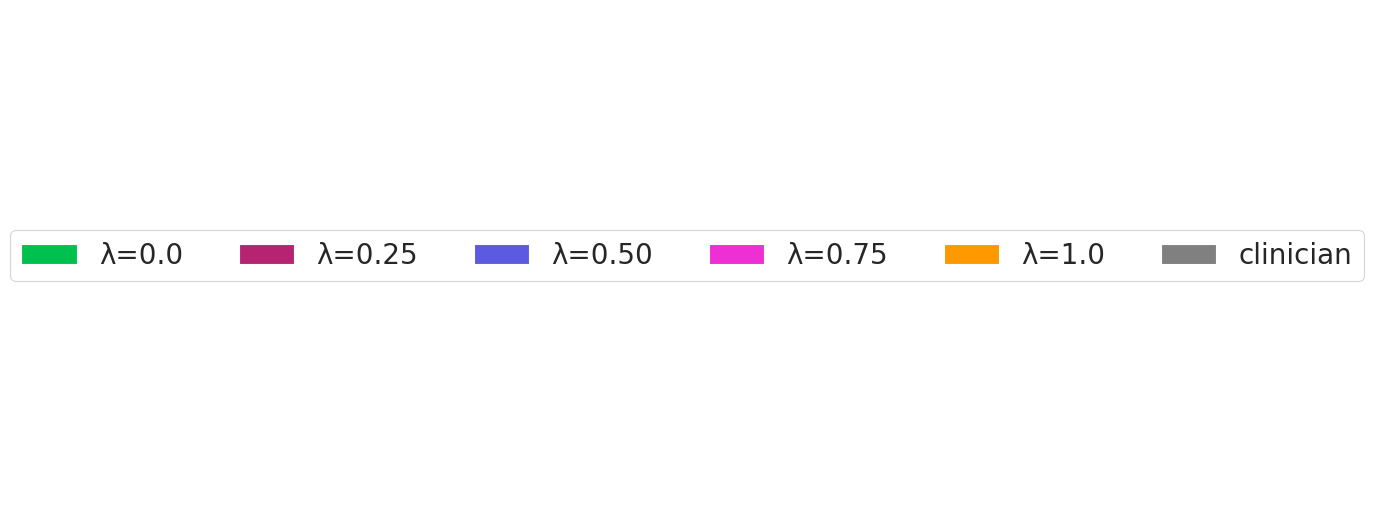

In [155]:
handles = [Patch(facecolor=v, edgecolor=None, label=k) for k, v in palette.items() if k in ["λ=0.0", "λ=0.25", "λ=0.50", "λ=0.75", "λ=1.0", "clinician"]]
fig, ax = plt.subplots()
ax.legend(handles=handles, loc="center", ncol=6, columnspacing=2, fontsize=20)
ax.axis("off")
fig.savefig(Path("./results") / "plots" / "protagonist__legend.pdf", bbox_inches=ax.get_legend().get_window_extent().transformed(fig.dpi_scale_trans.inverted()), bbox_extra_artists=[ax.get_legend()])